## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('data/data.csv')

#### Show Top 5 Records

In [7]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


#### Preparing X and Y variables

In [8]:
X = df.drop(columns=['Income'],axis=1)

In [9]:
X.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking


In [10]:
print("Categories in 'Education_Level' variable: ",end=" " )
print(df['Education_Level'].unique())

print("Categories in 'Occupation' variable: ",end=" ")
print(df['Occupation'].unique())

print("Categories in 'Location' variable: ",end=" " )
print(df['Location'].unique())

print("Categories in 'Marital_Status' variable: ",end=" " )
print(df['Marital_Status'].unique())

print("Categories in 'Employment_Status' variable: ",end=" " )
print(df['Employment_Status'].unique())

print("Categories in 'Type_of_Housing' variable: ",end=" " )
print(df['Type_of_Housing'].unique())

print("Categories in 'Gender' variable: ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Primary_Mode_of_Transportation' variable: ",end=" " )
print(df['Primary_Mode_of_Transportation'].unique())

Categories in 'Education_Level' variable:  ["Master's" 'High School' "Bachelor's" 'Doctorate']
Categories in 'Occupation' variable:  ['Technology' 'Finance' 'Others' 'Education' 'Healthcare']
Categories in 'Location' variable:  ['Urban' 'Rural' 'Suburban']
Categories in 'Marital_Status' variable:  ['Married' 'Single' 'Divorced']
Categories in 'Employment_Status' variable:  ['Full-time' 'Self-employed' 'Part-time']
Categories in 'Type_of_Housing' variable:  ['Apartment' 'Single-family home' 'Townhouse']
Categories in 'Gender' variable:  ['Male' 'Female']
Categories in 'Primary_Mode_of_Transportation' variable:  ['Public transit' 'Biking' 'Car' 'Walking']


In [11]:
y = df['Income']

In [12]:
y

0         72510
1         75462
2         71748
3         74520
4        640210
         ...   
9995      74994
9996      72676
9997    2684820
9998      57955
9999    1131084
Name: Income, Length: 10000, dtype: int64

In [13]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [14]:
cat_features

Index(['Education_Level', 'Occupation', 'Location', 'Marital_Status',
       'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
       'Gender', 'Primary_Mode_of_Transportation'],
      dtype='object')

In [15]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oe_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder", oe_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(10000, 13)

In [18]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
X_train.shape, X_test.shape

((9000, 13), (1000, 13))

#### Create an Evaluate Function to give all metrics after model Training

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1808747.1191
- Mean Absolute Error: 1110879.7260
- R2 Score: 0.0086
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1852163.7988
- Mean Absolute Error: 1130877.7569
- R2 Score: 0.0079


Lasso
Model performance for Training set
- Root Mean Squared Error: 1808747.1191
- Mean Absolute Error: 1110879.9485
- R2 Score: 0.0086
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1852163.9045
- Mean Absolute Error: 1130878.0224
- R2 Score: 0.0079


Ridge
Model performance for Training set
- Root Mean Squared Error: 1808747.1202
- Mean Absolute Error: 1110884.1036
- R2 Score: 0.0086
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1852163.0975
- Mean Absolute Error: 1130883.2347
- R2 Score: 0.0079


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1581766

### Results

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.048488
2,Ridge,0.007871
0,Linear Regression,0.007870
1,Lasso,0.007870
7,CatBoosting Regressor,-0.014408
3,K-Neighbors Regressor,-0.144295
6,XGBRegressor,-0.145085
8,AdaBoost Regressor,-0.176797
4,Decision Tree,-0.768495


## Linear Regression

In [22]:
rnd_model = RandomForestRegressor()
rnd_model = rnd_model.fit(X_train, y_train)
y_pred = rnd_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 4.11


## Plot y_pred and y_test

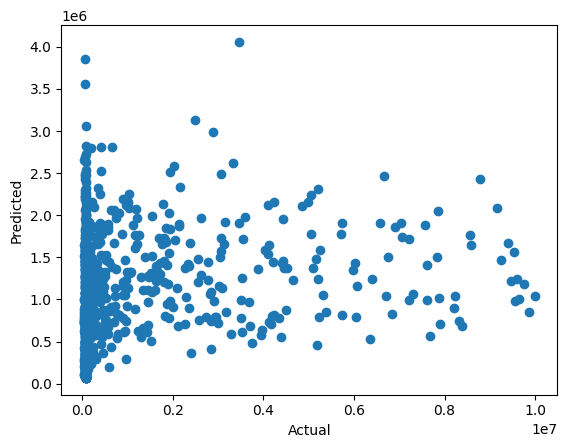

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

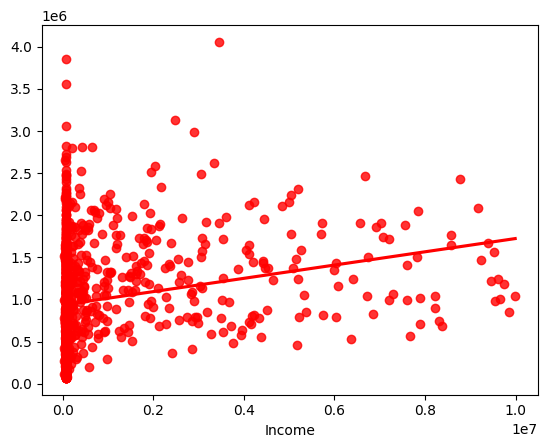

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6611,119829,1053539.36,-933710.36
9557,72180,322730.94,-250550.94
8111,257175,1855314.86,-1598139.86
1132,73530,478159.53,-404629.53
1238,64986,915622.91,-850636.91
...,...,...,...
7932,67420,856651.90,-789231.90
76,5324279,1058093.26,4266185.74
2483,67016,674791.24,-607775.24
6706,1906146,1551834.92,354311.08
